<h1 style = 'text-align-center'>Spotify Data Pipeline</h1>
             
<h5>Useful Link: </h5>
<a href = 'https://developer.spotify.com/console/get-recently-played/' target='_blank'> Spotify Developer Console Link</a>

In [9]:
import pymongo
from pymongo import MongoClient
import logging as logger
import pandas as pd
import requests
import json
import datetime
from config import USER_ID, TOKEN

In [140]:
logger.basicConfig(filename = 'AuditLogger.log',
                 filemode = 'w',
                  level = logger.INFO,
                  format = '%(asctime)s -%(levelname)s -%(message)s'
                 )

In [10]:

connection_string = "mongodb+srv://<PASSWORD>@spotifypipeline.lpaenzh.mongodb.net/test"
client = pymongo.MongoClient(connection_string)


In [11]:
#trying to list avaiable databases in mongoDB
client.list_database_names()

['mydb', 'admin', 'local']

In [12]:
#isolating the database 'mydb' which will be used to stire spotify data
db = client.mydb

In [13]:
#list of collections in the database
db.list_collection_names()

['mydb']

In [26]:
#creating a spotify collection
collection = db.spotify_songs

In [19]:
USER_ID = '31mqqbbqlvjqnibevcyrqpnitxga20'
TOKEN = 'BQBDUzKVGjv1GeUdtrl4PUvyYGIj6GZ8uyuhABh2WFBG_pB8LXvxAACIvKMeOHSmcRLq4ZzlRkLjE9FTwlnM_JyT-gvCrz19V_n32G8clrP-sj-VIBZnWcoOVv7tZBNMx7FOZavSATSbWppZXo6KQ0CD-ei6G4CydU3j7OLJ0wTFfw6gGuy7S9p2yu35PBYIm66UIw0W'

In [26]:
if __name__ == "__main__":
    headers = dict([("Accept", "application/json"),
        ("Content-Type", "application/json"),
        ("Authorization", "Bearer {token}".format(token = TOKEN))])


In [118]:
today = datetime.datetime.now()
last_15_days = today - datetime.timedelta(days=15)
last_15_days_unix_timestamp = int(last_15_days.timestamp()) * 1000


In [54]:
last_15_days_unix_timestamp 

1672056110000

In [119]:
r = requests.get("https://api.spotify.com/v1/me/player/recently-played?after={time}".format(time=last_15_days_unix_timestamp), headers=headers)

In [141]:
#handling loggings
try:
    logger.info('+' * 35)
    logger.info('Making HTTP Request to Spotify API')
    r = requests.get("https://api.spotify.com/v1/me/player/recently-played?after={time}".format(time=last_15_days_unix_timestamp), headers=headers)
    if ('401' in str(r) == True):
        raise Exception('HTTP 401 Unathorized Error')
except Exception as e:
    logger.error('{}'.format(e))

In [120]:
data = r.json()

In [121]:
data

{'items': [{'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
       'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
       'id': '5K4W6rqBFWDnAN6FQUkS6x',
       'name': 'Kanye West',
       'type': 'artist',
       'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
    

In [122]:
song_names = []
artist_names = []
played_at_list = []

In [123]:
for song in data['items']:
    song_names.append(song['track']['name'])
    artist_names.append(song['track']['artists'][0]['name'])
    played_at_list.append(song['played_at'][0:10])
    

In [124]:
song_dict = {
    'song_name': song_names,
    'artist_name': artist_names,
    'played_at': played_at_list
}

In [125]:
songs_df = pd.DataFrame(song_dict, columns=['song_name', 'artist_name', 'played_at'])

In [126]:
songs_df

,song_name,artist_name,played_at
0,Skit #1,Kanye West,2023-01-10
1,I Can't Make You Love Me - AIR Studios – 4AD/J...,Bon Iver,2023-01-10
2,Wash.,Bon Iver,2023-01-10
3,Always Love,Lauren Jauregui,2023-01-10
4,"the older you get, the less you cry",LANY,2023-01-10
5,if depression gets the best of me,Zevia,2023-01-10
6,A Little Bit Yours,JP Saxe,2023-01-10
7,blame's on me,Alexander Stewart,2023-01-10
8,georgia,Jonah Kagen,2023-01-10
9,"I miss you, I’m sorry",Gracie Abrams,2023-01-10


In [127]:
#tranforming data
songs_df['played_at'] = pd.to_datetime(songs_df['played_at']).dt.strftime('%d/%m/%y')
songs_df['song_name'] = songs_df['song_name'].astype('str')
songs_df['artist_name'] = songs_df['artist_name'].astype('str')

In [94]:
songs_df

,song_name,artist_name,played_at
0,blame's on me,Alexander Stewart,10/01/23
1,georgia,Jonah Kagen,10/01/23
2,"I miss you, I’m sorry",Gracie Abrams,10/01/23
3,Forget I Exist,Sam MacPherson,10/01/23
4,LET THE GRASS GROW,Ruel,10/01/23
5,august,Taylor Swift,10/01/23
6,Anti-Hero,Taylor Swift,10/01/23
7,Dreams - 2004 Remaster,Fleetwood Mac,10/01/23
8,As It Was,Harry Styles,10/01/23
9,Runaway,AURORA,10/01/23


In [128]:
#upload data to MongoDB
db.spotify_songs.insert_many(songs_df.to_dict('records'))

In [129]:
songs_df['identify'] = 1

In [130]:
songs_df = songs_df.drop(['artist_name', 'played_at'], axis = 1)

In [131]:
songs_df = songs_df.groupby('song_name').size()

In [132]:
songs_df 

song_name
A Little Bit Yours                                                 1
Always Love                                                        1
Anti-Hero                                                          1
As It Was                                                          1
Dreams - 2004 Remaster                                             1
Everything I Own                                                   1
Forget I Exist                                                     1
Georgia                                                            1
I Can't Make You Love Me - AIR Studios – 4AD/Jagjaguwar Session    1
I miss you, I’m sorry                                              1
LET THE GRASS GROW                                                 1
Lost                                                               1
Runaway                                                            1
Skit #1                                                            1
Wash.                   

<AxesSubplot:ylabel='song_name'>

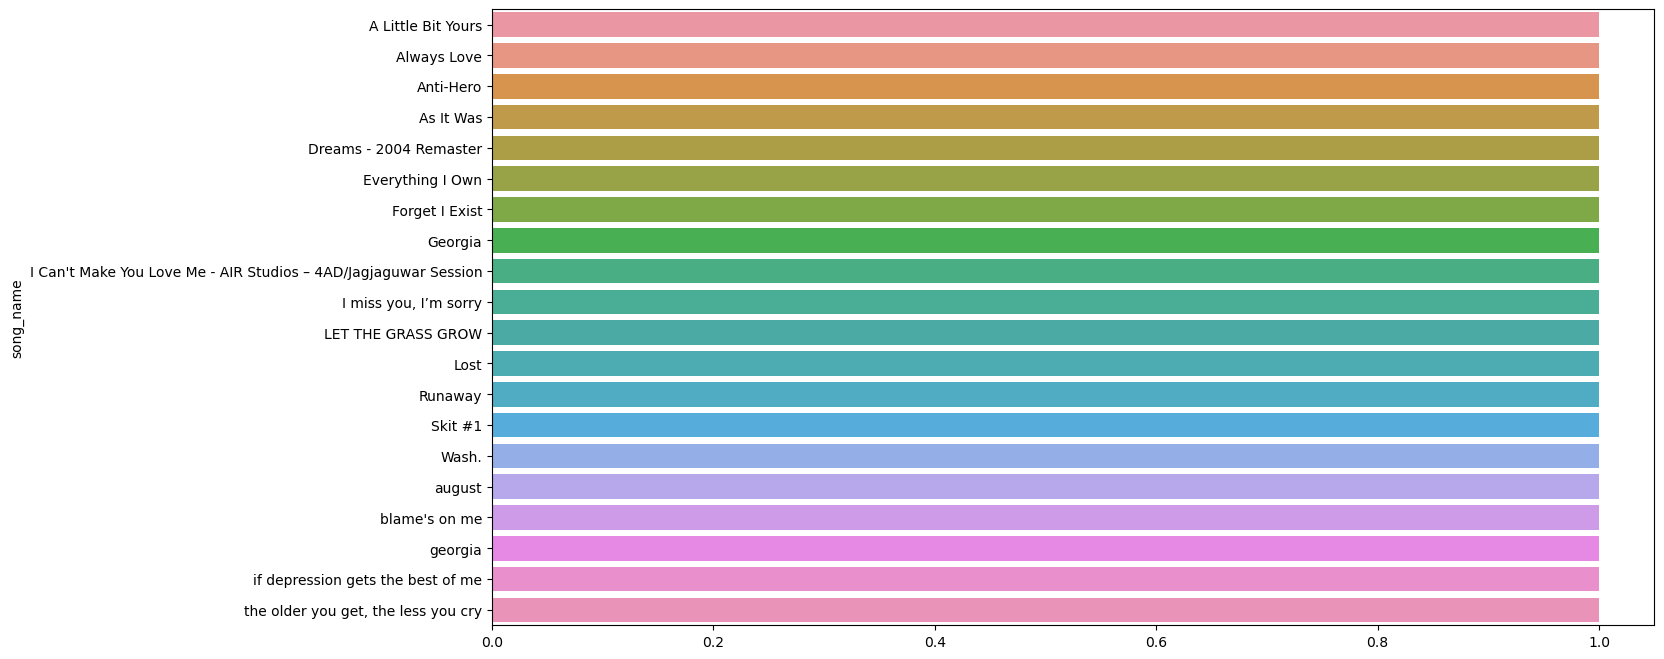

In [133]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(y = songs_df.index, x =songs_df.values)